# Import packages to parse results

In [1]:
import plotly.graph_objects as go
import scipy.stats as stats
from tabulate import tabulate
from IPython.display import HTML

# Import from shared notebook containing helper methods
import import_ipynb
from shared_notebook import create_dataframe, write_image, create_figure

importing Jupyter notebook from shared_notebook.ipynb
Stored 'colorPallet' (list)


### Set default color palete and size for making plots

In [2]:
%store -r colorPallet

## Log file locations relative to notebook

### For NLP, we have 3 functions which must be ran in sequential order

In [3]:
# kOps clusters (running on AWS)
# AWS EKS cluster
clusters={
    'kOps 8x 8vCPU 16Gb arm64': 'kops-multi-tenant-spot-8x-8vcpu-16gb-arm64',
    'EKS 8x 8vCPU 16Gb arm64': 'eks-multi-tenant-spot-8x-8vcpu-16gb-arm64',
    'kOps 8x 8vCPU 16Gb x86_64': 'kops-multi-tenant-spot-8x-8vcpu-16gb',
    'EKS 8x 8vCPU 16Gb x86_64': 'eks-multi-tenant-spot-8x-8vcpu-16gb',
}
methods=('preprocess', 'train', 'query')
headers=list(methods)
headers.insert(0, 'cluster')

In [4]:
nlp_df=dict()
for k, v in clusters.items():
    nlp_df[k]=dict()
    for m in methods:
        nlp_df[k][m]=create_dataframe(f"../logs/openfaas/{v}/nlp/*{m}*")

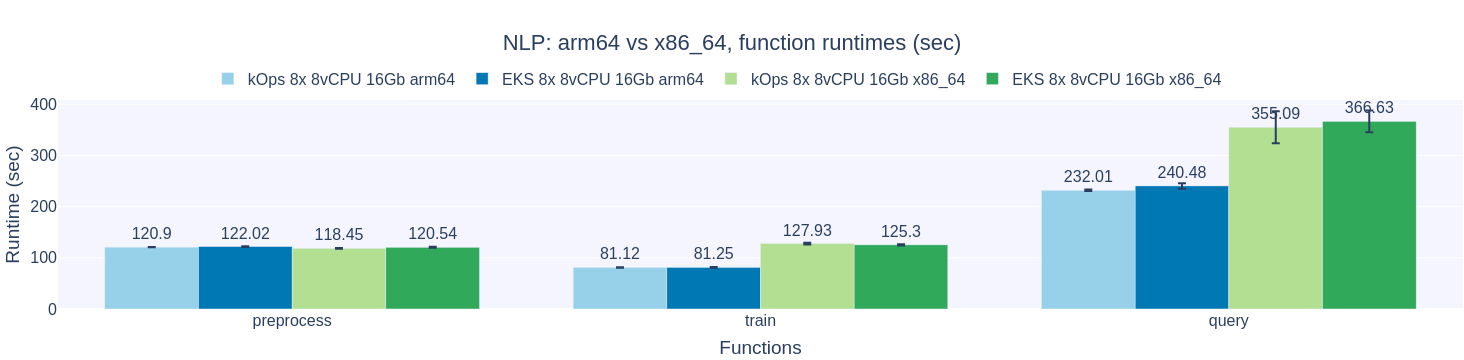

In [8]:
fig = create_figure('NLP: arm64 vs x86_64, function runtimes (sec)', 'Functions', 'Runtime (sec)')

for i, k in enumerate(clusters):
    y_data=[nlp_df[k][m]['runtime'].mean()/1000 for m in methods]
    fig.add_trace(
        go.Bar(
            x = methods,
            y = y_data,
            error_y=dict(
                type='data',
                symmetric=True,
                array=[nlp_df[k][m]['runtime'].sem()/1000 for m in methods]
            ),
            name = k,
            text=[round(v, 2) for v in y_data],
            textposition='outside',
            # mode='markers',
            # marker=dict(size=10),
            marker_color=colorPallet[i]
        )
    )

fig.show()
write_image(fig, 'nlp_arm64_runtime_bar.png')

# Using tabulate to create tables for results

In [6]:
# Mean runtime
table=dict()
data=dict()
stats=('mean', 'std', 'cv', 'sem')
for s in stats:
    data[s]=[]
for i, k in enumerate(clusters):
    for s in stats:
        data[s].append([])
        data[s][i].append(k)
    for m in methods:
        mean=nlp_df[k][m]['runtime'].mean()/1000
        std=nlp_df[k][m]['runtime'].std()/1000
        sem=nlp_df[k][m]['runtime'].sem()/1000
        data['mean'][i].append(mean)
        data['std'][i].append(std)
        data['cv'][i].append(std/mean)
        data['sem'][i].append(sem)

table['mean']=tabulate(data['mean'], tablefmt='html', headers=headers)
display(HTML('<h3>NLP: Mean runtimes (sec)</h3>'))
display(table['mean'])

table['std']=tabulate(data['std'], tablefmt='html', headers=headers)
display(HTML('<h3>NLP: Standard deviation (sec)</h3>'))
display(table['std'])

table['cv']=tabulate(data['cv'], tablefmt='html', headers=headers)
display(HTML('<h3>NLP: Coefficient of variation</h3>'))
display(table['cv'])

table['sem']=tabulate(data['sem'], tablefmt='html', headers=headers)
display(HTML('<h3>NLP: Standard erorr of the mean (sec)</h3>'))
display(table['sem'])

cluster,preprocess,train,query
kOps 8x 8vCPU 16Gb arm64,120.904,81.1241,232.007
EKS 8x 8vCPU 16Gb arm64,122.025,81.2515,240.48
kOps 8x 8vCPU 16Gb x86_64,118.454,127.932,355.087
EKS 8x 8vCPU 16Gb x86_64,120.541,125.296,366.628


cluster,preprocess,train,query
kOps 8x 8vCPU 16Gb arm64,1.23064,1.14686,4.02245
EKS 8x 8vCPU 16Gb arm64,2.1866,1.92392,16.9128
kOps 8x 8vCPU 16Gb x86_64,2.72147,5.2639,98.6258
EKS 8x 8vCPU 16Gb x86_64,2.86106,3.7009,67.3907


cluster,preprocess,train,query
kOps 8x 8vCPU 16Gb arm64,0.0101786,0.0141371,0.0173376
EKS 8x 8vCPU 16Gb arm64,0.0179193,0.0236786,0.0703294
kOps 8x 8vCPU 16Gb x86_64,0.0229749,0.041146,0.277751
EKS 8x 8vCPU 16Gb x86_64,0.0237352,0.0295373,0.183812


cluster,preprocess,train,query
kOps 8x 8vCPU 16Gb arm64,0.389161,0.362668,1.27201
EKS 8x 8vCPU 16Gb arm64,0.691462,0.608397,5.34831
kOps 8x 8vCPU 16Gb x86_64,0.860605,1.66459,31.1882
EKS 8x 8vCPU 16Gb x86_64,0.904747,1.17033,21.3108


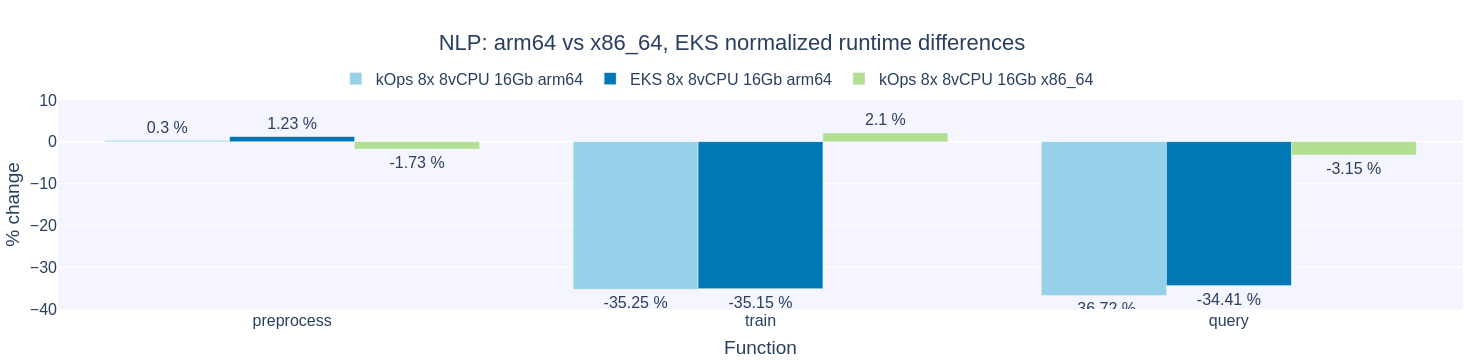

In [7]:
fig = create_figure('NLP: arm64 vs x86_64, EKS normalized runtime differences', 'Function', '% change')

for i, k in enumerate(list(clusters.keys())[:-1]):
    y_data=[]
    y_text=[]
    for m in methods:
        kops_mean=nlp_df[k][m]['runtime'].mean()
        eks_mean=nlp_df['EKS 8x 8vCPU 16Gb x86_64'][m]['runtime'].mean()
        percent_change=(kops_mean - eks_mean) * 100 / eks_mean
        y_data.append(percent_change)
        y_text.append(f'{round(percent_change, 2)} %')
    fig.add_trace(go.Bar(name=k,
                         x=methods,
                         y=y_data,
                         marker_color=colorPallet[i],
                         text=y_text,
                         textposition='outside'))
fig.update_layout(yaxis_range=[-40,10])

fig.show()

# Save graph
write_image(fig, 'nlp_arm64_percentage_difference.png')